Code below does a grid search for optimal HMM values:


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from copy import deepcopy
import glob
import sys

[sys.path.append(f) for f in glob.glob('../utils/*')]
import preprocess
import sweep_utils
from plotting_utils import figSize, setTickLabels
from lineplots import plotsd
from session_utils import *
from recalibration_utils import *
from click_utils import *



SWEEP_DIR = '/oak/stanford/groups/shenoy/gwilson/nonstationarities/T5/Stabilizer/Stabilizersweep/'
params    = ['model', 'B', 'n_components', 'thresh']


files     = glob.glob(SWEEP_DIR + '*')
scores_df = sweep_utils.getSummaryDataFrame(files, params + ['R2_score', 'pearson_r', 'days_apart'])

In [126]:

unique_vals = dict([(x, np.unique(scores_df[x])) for x in params])
unique_lens = [len(np.unique(scores_df[x])) for x in params]
nSamples    = int(scores_df.shape[0] / np.product([len(x) for x in unique_vals.values()]))
scores_arr  = np.zeros([*unique_lens, nSamples])

for i, model in enumerate(unique_vals['model']):
    for j, B in enumerate(unique_vals['B']):
        for k, n_components in enumerate(unique_vals['n_components']):
            for l, thresh in enumerate(unique_vals['thresh']):
                subset                 = scores_df.loc[(scores_df["model"] == model) & (scores_df["B"] == B) &
                                                       (scores_df["n_components"] == n_components) & (scores_df['thresh'] == thresh)]
                scores_arr[i, j, k, l, :] = subset['R2_score']


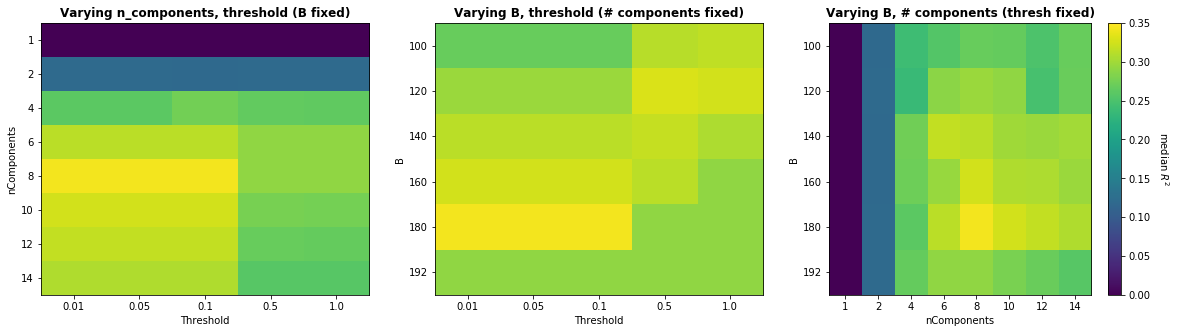

In [127]:
figSize(5, 20)

medscores = np.median(scores_arr, axis = -1)

opt_model_idx, opt_B_idx, opt_n_components_idx, opt_thresh_idx = np.unravel_index(medscores.argmax(), medscores.shape)

opt_model         = unique_vals['model'][opt_model_idx]
opt_B             = unique_vals['B'][opt_B_idx]
opt_n_components = unique_vals['n_components'][opt_n_components_idx]
opt_thresh        = unique_vals['thresh'][opt_thresh_idx]


opt_dict = dict()
opt_dict['model']        = opt_model
opt_dict['B']            = opt_B
opt_dict['n_components'] = opt_n_components
opt_dict['thresh']       = opt_thresh

clim = [0, 0.35]

plt.subplot(1, 3, 1)
plt.imshow(medscores[opt_model_idx, opt_B_idx, :, :], aspect = 'auto')
plt.title('Varying n_components, threshold (B fixed)', fontweight = 'bold')
setTickLabels(plt.gca(), unique_vals['n_components'], 'y')
setTickLabels(plt.gca(), unique_vals['thresh'], 'x')
plt.xlabel('Threshold')
plt.ylabel('nComponents')
plt.clim(clim)

plt.subplot(1, 3, 2)
plt.imshow(medscores[opt_model_idx, :, opt_n_components_idx, :], aspect = 'auto')
plt.title('Varying B, threshold (# components fixed)', fontweight = 'bold')
setTickLabels(plt.gca(), unique_vals['B'], 'y')
setTickLabels(plt.gca(), unique_vals['thresh'], 'x')
plt.xlabel('Threshold')
plt.ylabel('B')
plt.clim(clim)

plt.subplot(1, 3, 3)
plt.imshow(medscores[opt_model_idx, :, :, opt_thresh_idx], aspect = 'auto')
plt.title('Varying B, # components (thresh fixed)', fontweight = 'bold')
setTickLabels(plt.gca(), unique_vals['B'], 'y')
setTickLabels(plt.gca(), unique_vals['n_components'], 'x')
plt.xlabel('nComponents')
plt.ylabel('B')
plt.clim(clim)
cbar = plt.colorbar()
cbar.set_label('median $R^2$', fontweight = 'medium', rotation = 270, labelpad = 20)

plt.show()

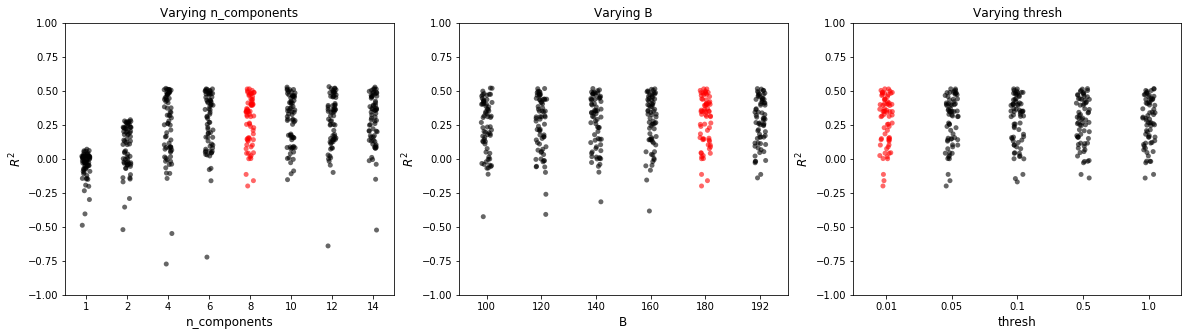

In [128]:
import seaborn as sns
figSize(5, 20)

stripplot_df = scores_df.loc[scores_df['model'] == 'FactorAnalysis']

plt.subplot(1, 3, 1)
sweep_utils.makeStripPlot(stripplot_df, opt_dict, unique_vals, var = 'n_components')

plt.subplot(1, 3, 2)
sweep_utils.makeStripPlot(stripplot_df, opt_dict, unique_vals, var = 'B')

plt.subplot(1, 3, 3)
sweep_utils.makeStripPlot(stripplot_df, opt_dict, unique_vals, var = 'thresh')


plt.show()

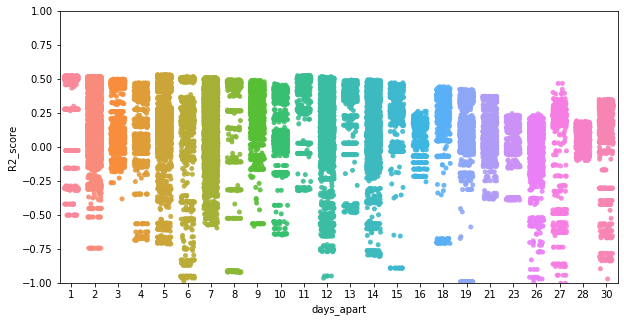

In [2]:
figSize(5, 10)

sns.stripplot(data = scores_df, x = 'days_apart', y = 'R2_score', alpha = 0.9, jitter = 0.3 )
plt.ylim([-1, 1])
plt.show()

In [103]:
scores_df = pd.DataFrame(scores)

In [ ]:
import seaborn as sns 

medscores = np.median(scores, axis = 0)
args      = np.unravel_index(medscores.argmax(), medscores.shape)

print('Best weighting function: logistic with inflection = ', inflection_sweep[args[0]], ' exponent = ', exp_sweep[args[1]])
print('Best kappa: ', kappa_sweep[args[2]])
print('Best threshold: ', thresh_sweep[args[3]])

plt.subplot(1, 2, 1)
x = np.linspace(0, 400, 3000)
y = coef = 1 / (1 + np.exp(-1 * (x - inflection_sweep[args[0]]) * exp_sweep[args[1]]))

figSize(5, 10)
plt.plot(x, y)
plt.xlabel('Distance to target')
plt.ylabel('Kappa adjustment factor')
plt.title('Weighting function')

plt.subplot(1, 2, 2)
sns.swarmplot(data = scores[:, args[0], args[1], args[2], args[3]], orient = 'v')
plt.title('Session scores (best parameters)')
plt.ylabel('R^2 (new day)')

In [ ]:
kappa_sweep[args[0]]
kappa_sweep[args[0]]